# **Stock Forecasting Prediction using LSTM**

### **Problem Statement**

Develop a predictive model using Long Short-Term Memory (LSTM) to forecast the closing stock prices based on historical stock market data, enabling insights for better financial decision-making.



## **Overview**

The dataset contains historical stock data with features such as Date, Open, High, Low, Close, Volume, Dividends, and Stock Splits. The primary objective is to utilize these features to build a time-series forecasting model for predicting the Close prices.

Stock price prediction involves several challenges due to the noisy, volatile, and non-linear nature of the market. LSTMs, with their ability to capture sequential patterns and long-term dependencies, are an excellent choice for this task.

In [79]:
#import libraries
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12, 6)
import joblib


In [80]:
#read the dat
df = pd.read_csv("/content/sample_data/Apple.csv")

df= df[8000:]
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
8000,2012-08-28 00:00:00-04:00,20.422214,20.456102,20.291811,20.416769,267416800,0.0,0.0
8001,2012-08-29 00:00:00-04:00,20.430384,20.503603,20.350206,20.376528,202806800,0.0,0.0
8002,2012-08-30 00:00:00-04:00,20.290907,20.318440,20.055212,20.086073,302699600,0.0,0.0
8003,2012-08-31 00:00:00-04:00,20.188347,20.229192,19.885786,20.127533,338321200,0.0,0.0
8004,2012-09-04 00:00:00-04:00,20.143261,20.427062,20.105139,20.421919,367892000,0.0,0.0


In [81]:
#make the Date column the index
df.index = pd.to_datetime(df["Date"],format = 'mixed', dayfirst=True, utc= True)

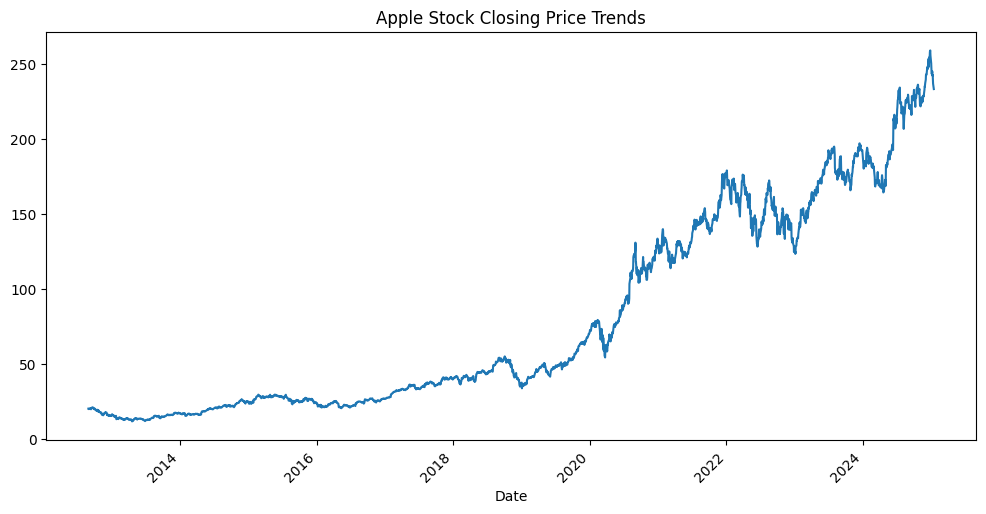

In [82]:
#plot the Closing stock trend

df["Close"].plot()
plt.title("Apple Stock Closing Price Trends")
plt.xticks(rotation=45);

**Early Years (1980-2000)**

- The stock price remained relatively stable with minimal growth during this period.

**Growth Phase (2000-2010)**

- A gradual upward trend began, especially after the launch of iconic products such as the iPod (2001) and the iPhone (2007).

**Exponential Growth (2010-2025)**

-  (2020-2025) appears particularly steep, reflecting factors like increased adoption of technology, Apple’s dominance in premium markets, and potentially favorable market conditions.


In [83]:
#preprocess the data using Min Max so that the data ranges from 0 to 1 for the model to learn
df = df[["Close"]]
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df =scaler.transform(df)

joblib.dump(scaler, 'scaling.pkl')

['scaling.pkl']

In [84]:
#supervise  the model to predict the nth value from the provided data

window_size = 5

def df_to_X_y(df, window_size):

   X = []        # values
   y = []        # pred
   for i in range(len(df)-window_size):
      row = [[a] for a in df[i:i+window_size]]
      X.append(row)
      label = df[i+window_size]
      y.append(label)
   return np.array(X), np.array(y)


In [85]:
  # the size of the input values
X, y = df_to_X_y(df, window_size)
X.shape, y.shape


((3108, 5, 1, 1), (3108, 1))

In [86]:
X[:5]

array([[[[0.03431156]],

        [[0.03414869]],

        [[0.03297315]],

        [[0.03314095]],

        [[0.0343324 ]]],


       [[[0.03414869]],

        [[0.03297315]],

        [[0.03314095]],

        [[0.0343324 ]],

        [[0.03375193]]],


       [[[0.03297315]],

        [[0.03314095]],

        [[0.0343324 ]],

        [[0.03375193]],

        [[0.03449159]]],


       [[[0.03314095]],

        [[0.0343324 ]],

        [[0.03375193]],

        [[0.03449159]],

        [[0.0350022 ]]],


       [[[0.0343324 ]],

        [[0.03375193]],

        [[0.03449159]],

        [[0.0350022 ]],

        [[0.03283477]]]])

# **Data Split**

In [87]:
X_train , y_train =X[:2000], y[:2000]
X_val, y_val = X[2000:2500], y[2000:2500]
X_test, y_test = X[2500:], y[2500:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2000, 5, 1, 1),
 (2000, 1),
 (500, 5, 1, 1),
 (500, 1),
 (608, 5, 1, 1),
 (608, 1))

# **Import Model Dependencies**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import  RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [89]:
model1 = Sequential()
model1.add(InputLayer((window_size, 1)))
model1.add(LSTM(100))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,617 (162.57 KB)

 Trainable params: 41,617 (162.57 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
#save the best model and compile
cp = ModelCheckpoint('model1/model1.keras', save_best_only = True)
model1.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate=0.001), metrics = [RootMeanSquaredError()])

In [91]:
model1.fit(X_train, y_train, validation_data =( X_val, y_val), epochs = 100, callbacks = [cp]);

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0055 - root_mean_squared_error: 0.0712 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0558
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2285e-05 - root_mean_squared_error: 0.0056 - val_loss: 9.5247e-04 - val_root_mean_squared_error: 0.0309
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3255e-05 - root_mean_squared_error: 0.0048 - val_loss: 6.9058e-04 - val_root_mean_squared_error: 0.0263
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.4449e-05 - root_mean_squared_error: 0.0049 - val_loss: 7.1572e-04 - val_root_mean_squared_error: 0.0268
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.3657e-05 - root_mean_squared_error: 0.0049 - val_loss: 6.6877e-04 - val_root_mean_squared_error: 0.0259
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.4961e-05 - root_mean_squared_error: 0.0050 - val_loss: 8.9242e-04 - val_root_mean_squared_error: 0.0299
Epoch 7/100
6

In [92]:
#load the best model and make predictions
from tensorflow.keras.models import load_model
model1= load_model('model1/model1.keras')

## **Predictions**

In [93]:
#predict on training data
train_predictions = model1.predict(X_train).flatten()
y_train = y_train.flatten()

#create a dataframe for train results
train_results = pd.DataFrame(data = {'Train Predictions': train_predictions, "Actuals" : y_train})
train_results.head(2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


,Train Predictions,Actuals
0,0.03493,0.033752
1,0.03499,0.034492


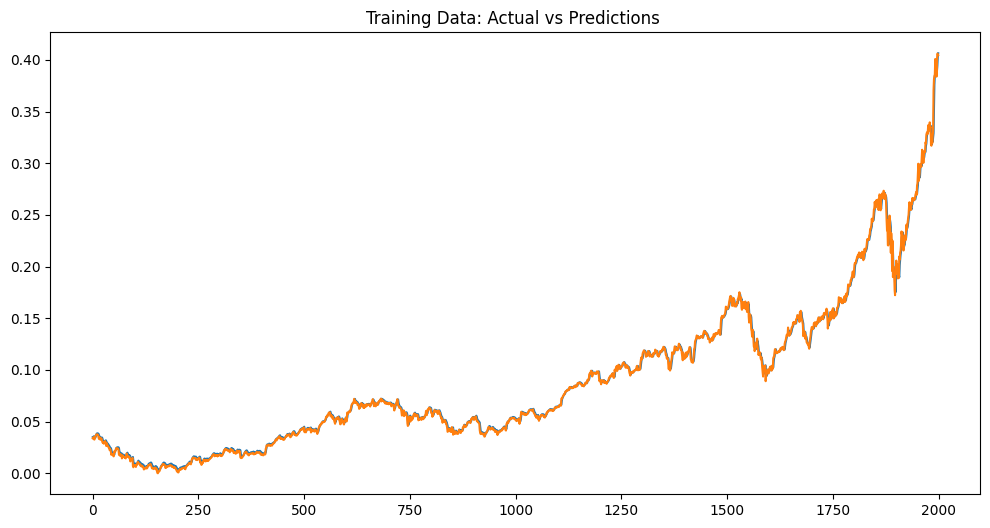

In [94]:
#plot train results
plt.plot(train_results["Train Predictions"])
plt.plot(train_results['Actuals'])
plt.title("Training Data: Actual vs Predictions ");

In [95]:
#predict on validation data
val_predictions = model1.predict(X_val).flatten()
y_val = y_val.flatten()
val_results = pd.DataFrame(data = {"Val Predictions": val_predictions, "Actuals": y_val})
val_results.head(2)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Val Predictions,Actuals
0,0.406346,0.408246
1,0.407900,0.408818


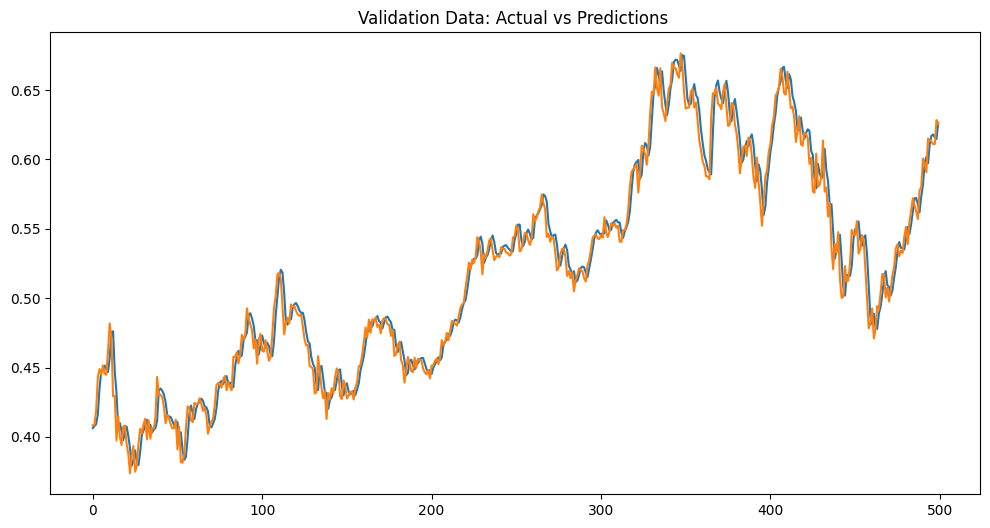

In [96]:
#plot val results
plt.plot(val_results["Val Predictions"])
plt.plot(val_results['Actuals'])
plt.title("Validation Data: Actual vs Predictions ");

In [97]:
#predict on testing data
test_predictions = model1.predict(X_test).flatten()
y_test= y_test.flatten()
test_results = pd.DataFrame(data = {"Test Predictions": test_predictions, "Actuals": y_test})
test_results.head(2)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Test Predictions,Actuals
0,0.629929,0.639823
1,0.640062,0.644181


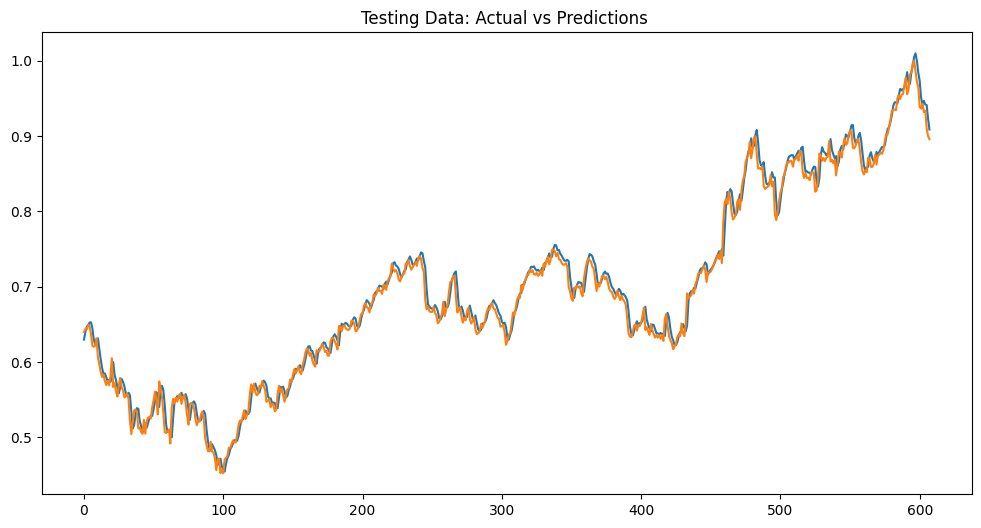

In [98]:
#plot the test results
plt.plot(test_results["Test Predictions"])
plt.plot(test_results['Actuals'])
plt.title("Testing Data: Actual vs Predictions ");


# **Validation**

In [99]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_results['Actuals'], test_results['Test Predictions']))
print(rmse)

0.012594578823369729


In [100]:
joblib.dump(model1, "model.keras")

['model.keras']